- 아이리스 데이터

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()

data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target
data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [22]:
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [27]:
target = 'target'

x = data.drop(target, axis=1)
y = data[target]
y.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

#### one-hot encoding

In [28]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y,3)

#### train,test 분리

In [29]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Functional API

In [30]:
x.shape, y.shape

((150, 4), (150, 3))

In [32]:
# 청소
keras.backend.clear_session()

# 모델 연결
il = keras.layers.Input(shape=(4,))
hl = keras.layers.Dense(16, activation='relu', name='hl1')(il)
hl = keras.layers.Dense(16, activation='relu', name='hl2')(hl)
ol = keras.layers.Dense(3,activation='softmax')(hl)

# 모델 선언
model = keras.models.Model(il,ol)

# 모델 컴파일
model.compile(loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'],
              optimizer=keras.optimizers.Adam())

# 모델 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 hl1 (Dense)                 (None, 16)                80        
                                                                 
 hl2 (Dense)                 (None, 16)                272       
                                                                 
 dense (Dense)               (None, 3)                 51        
                                                                 
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


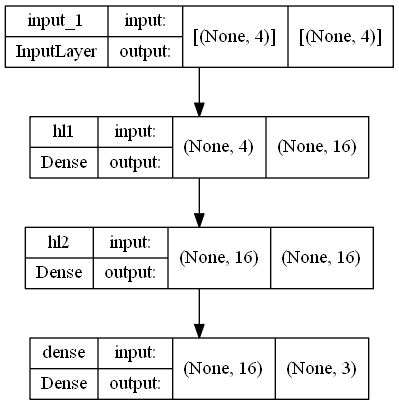

In [33]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

#### Early stoping

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

hist = model.fit(x_train, y_train,
                 epochs=1000,
                 verbose=1,
                 validation_split=0.1,
                 callbacks=[es])

Epoch 1/1000
4/4 [==============================] - 1s 71ms/step - loss: 1.3038 - accuracy: 0.3519 - val_loss: 1.4197 - val_accuracy: 0.1667
Epoch 2/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.1557 - accuracy: 0.3519 - val_loss: 1.2698 - val_accuracy: 0.1667
Epoch 3/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.0519 - accuracy: 0.3519 - val_loss: 1.1581 - val_accuracy: 0.1667
Epoch 4/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.9791 - accuracy: 0.4444 - val_loss: 1.0750 - val_accuracy: 0.2500
Epoch 5/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.9225 - accuracy: 0.5278 - val_loss: 1.0237 - val_accuracy: 0.4167
Epoch 6/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.8910 - accuracy: 0.6019 - val_loss: 0.9927 - val_accuracy: 0.3333
Epoch 7/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.8663 - accuracy: 0.5926 - val_loss: 0.9678 - val_accuracy: 0.3333
Epoch 8/1000


Epoch 59/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.2542 - accuracy: 0.9630 - val_loss: 0.2547 - val_accuracy: 1.0000
Epoch 60/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2474 - accuracy: 0.9630 - val_loss: 0.2490 - val_accuracy: 1.0000
Epoch 61/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2402 - accuracy: 0.9722 - val_loss: 0.2447 - val_accuracy: 1.0000
Epoch 62/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2351 - accuracy: 0.9722 - val_loss: 0.2407 - val_accuracy: 1.0000
Epoch 63/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2308 - accuracy: 0.9537 - val_loss: 0.2371 - val_accuracy: 1.0000
Epoch 64/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2272 - accuracy: 0.9630 - val_loss: 0.2293 - val_accuracy: 1.0000
Epoch 65/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.2234 - accuracy: 0.9630 - val_loss: 0.2201 - val_accuracy: 1.0000
Epoch 

4/4 [==============================] - 0s 10ms/step - loss: 0.1238 - accuracy: 0.9722 - val_loss: 0.0945 - val_accuracy: 1.0000
Epoch 117/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1232 - accuracy: 0.9722 - val_loss: 0.0911 - val_accuracy: 1.0000
Epoch 117: early stopping


## 평가

In [35]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 22ms/step - loss: 0.1274 - accuracy: 1.0000


[0.12736287713050842, 1.0]

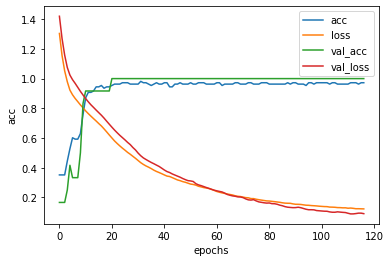

In [50]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['val_loss'])

plt.legend(['acc', 'loss', 'val_acc', 'val_loss'])
plt.xlabel('epochs')
plt.ylabel('acc')
plt.show()